In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import sklearn.metrics
import itertools

## 【課題1】練習のために特徴量とカテゴリを選択

In [2]:
data = sklearn.datasets.load_iris()

In [3]:
features = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width',
]

In [4]:
X = pd.DataFrame(data.data, columns=features)
X.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
y = pd.DataFrame(data.target, columns=["Species"])
y.head(10)

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [6]:
df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 特徴量とカテゴリを選択

In [7]:
# label: versicolor = 1, virginica = 2
df_selected = df.query("Species in [1, 2]")[["sepal_length", "petal_length", "Species"]]
df_selected

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## 【問題2】データの分析

## 散布図

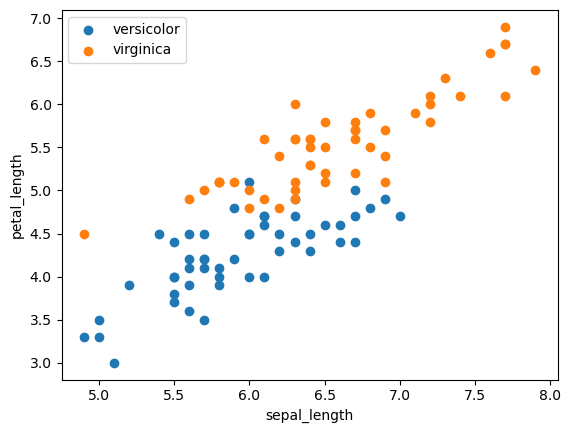

In [8]:
plt.scatter(df_selected.loc[df_selected["Species"] == 1, "sepal_length"], df_selected.loc[df_selected["Species"] == 1, "petal_length"], label="versicolor")
plt.scatter(df_selected.loc[df_selected["Species"] == 2, "sepal_length"], df_selected.loc[df_selected["Species"] == 2, "petal_length"], label="virginica")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()
plt.show()

### 箱ひげ図

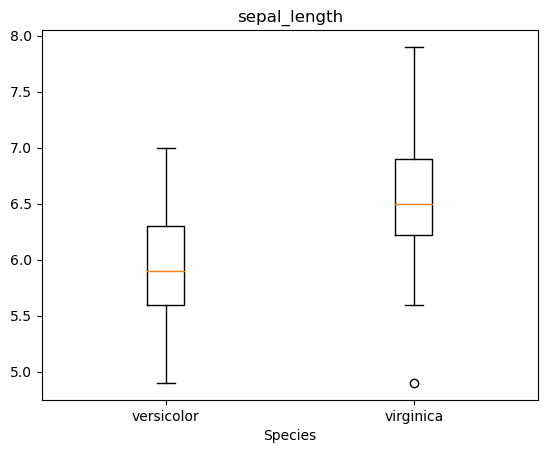

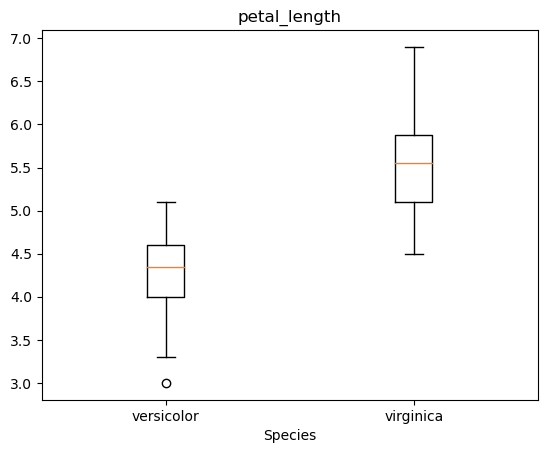

In [9]:
for feature in ["sepal_length", "petal_length"]:
    group_df = [g[1][feature] for g in df_selected.groupby("Species")]
    plt.boxplot(group_df, labels=["versicolor", "virginica"])
    plt.title(feature)
    plt.xlabel("Species")
    plt.show()

### バイオリン図

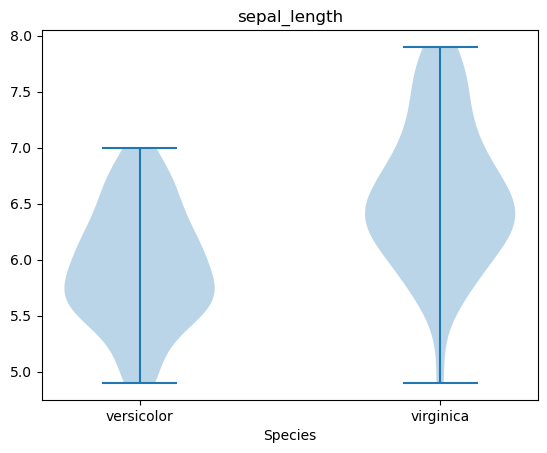

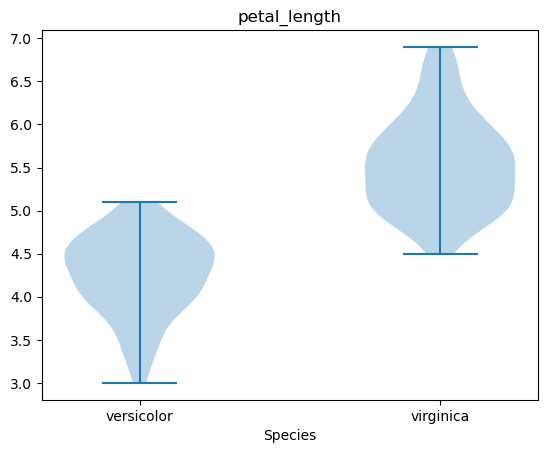

In [10]:
for feature in ["sepal_length", "petal_length"]:
    group_df = [g[1][feature] for g in df_selected.groupby("Species")]
    plt.violinplot(group_df)
    plt.title(feature)
    plt.xlabel("Species")
    plt.xticks([1,2], ["versicolor", "virginica"])
    plt.show()

## 【問題3】前処理・訓練データと検証データの分割

In [11]:
from sklearn.model_selection import train_test_split
X = df_selected.iloc[:, 0:2].to_numpy()
y = df_selected.iloc[:, 2].to_numpy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=131)

In [12]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((75, 2), (25, 2), (75,), (25,))

## 【問題4】前処理・標準化

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_valid_norm = scaler.transform(X_valid)
X_valid_norm

array([[ 0.76411038,  1.11834564],
       [ 1.086067  ,  0.27718309],
       [-0.36273779, -0.44381338],
       [-0.84567272, -0.80431162],
       [-0.20175948, -0.20348123],
       [ 1.086067  ,  0.03685093],
       [-1.32860765, -0.44381338],
       [-0.84567272, -0.9244777 ],
       [ 2.69585009,  1.83934211],
       [-0.20175948, -0.20348123],
       [ 0.76411038,  0.39734917],
       [ 0.12019714,  0.03685093],
       [-0.68469441, -0.9244777 ],
       [ 1.72998023,  1.71917603],
       [-0.5237161 ,  0.27718309],
       [-1.00665103, -0.44381338],
       [ 0.92508869,  1.23851172],
       [-1.97252089, -1.64547417],
       [-0.84567272,  0.15701701],
       [ 1.56900192,  1.35867779],
       [ 1.89095854,  1.47884387],
       [ 0.76411038, -0.20348123],
       [ 0.12019714,  0.27718309],
       [-1.16762934, -1.04464378],
       [ 2.37389347,  1.47884387]])

## 【問題5】学習と推定

In [14]:
from sklearn.neighbors import KNeighborsClassifier

ks = [1,2,3,5]
models = {}

for k in ks:
    print(f"{k}-nn")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_norm, y_train)
    y_pred = knn.predict(X_valid_norm)
    print("予測", y_pred)
    print("正解", y_valid)
    models[k] = knn

1-nn
予測 [2 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 1 2 2 2 1 2 1 2]
正解 [2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]
2-nn
予測 [2 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 1 2 2 2 1 2 1 2]
正解 [2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]
3-nn
予測 [2 1 1 1 2 1 1 1 2 2 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2]
正解 [2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]
5-nn
予測 [2 1 1 1 2 1 1 1 2 2 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2]
正解 [2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]


## 【問題6】評価

In [15]:
for k in ks:
    y_pred = models[k].predict(X_valid_norm)
    print(f"{k}-nn")
    print("Accuracy", sklearn.metrics.accuracy_score(y_valid, y_pred))
    print("Precision", sklearn.metrics.precision_score(y_valid, y_pred))
    print("Recall", sklearn.metrics.recall_score(y_valid, y_pred))
    print("F1-Score", sklearn.metrics.f1_score(y_valid, y_pred))
    print(sklearn.metrics.confusion_matrix(y_valid, y_pred))
    print()

1-nn
Accuracy 0.84
Precision 0.8
Recall 0.9230769230769231
F1-Score 0.8571428571428571
[[12  1]
 [ 3  9]]

2-nn
Accuracy 0.84
Precision 0.8
Recall 0.9230769230769231
F1-Score 0.8571428571428571
[[12  1]
 [ 3  9]]

3-nn
Accuracy 0.84
Precision 0.9090909090909091
Recall 0.7692307692307693
F1-Score 0.8333333333333333
[[10  3]
 [ 1 11]]

5-nn
Accuracy 0.84
Precision 0.9090909090909091
Recall 0.7692307692307693
F1-Score 0.8333333333333333
[[10  3]
 [ 1 11]]



- Accuracy（正解率）は全検証データの中で分類結果が正しかった割合を表す。
- Precision（適合率）はそのクラスであると予測したデータのうち、実際に正しかった割合。
- Recall（再現率）は正解がそのクラスであるデータのうち、モデルがそのクラスであると予測した割合。
- F値はPrecisionとRecallの調和平均。データラベルの割合が偏っているときに、多いクラスばかりを予測するでたらめなモデルでもAccuracyが大きくなるので、代わりF値を使う。

## 【問題7】可視化

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

検証データを丸点で表示します

1-nn


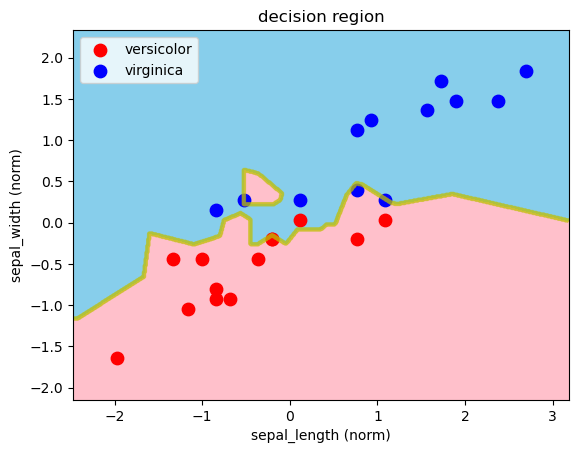


2-nn


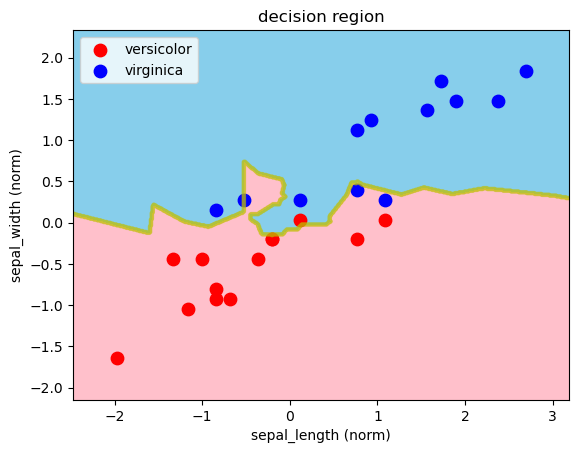


3-nn


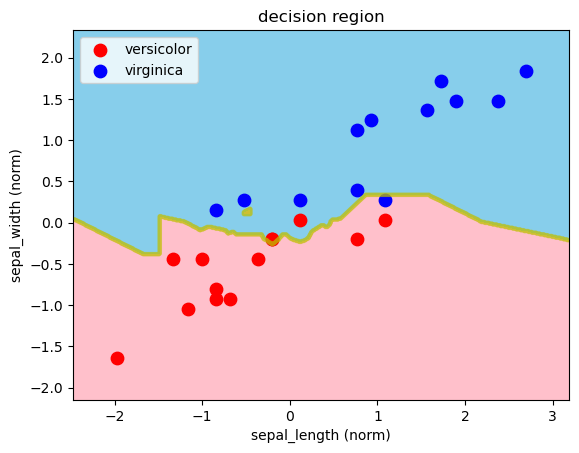


5-nn


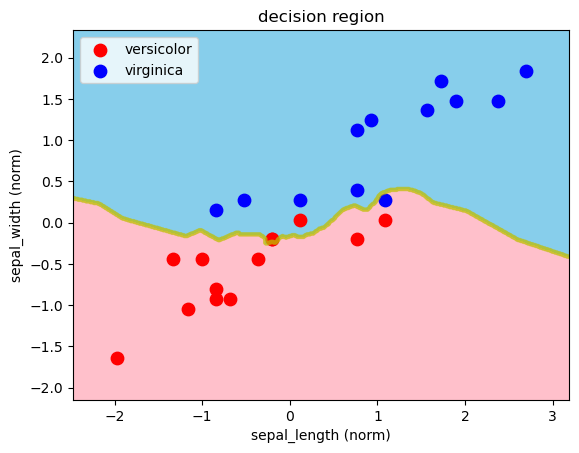

In [17]:
for k in ks:
    print(f"{k}-nn")
    decision_region(X_valid_norm, y_valid, models[k], xlabel=f'{features[0]} (norm)', ylabel=f'{features[1]} (norm)')
    print()

## 【問題8】他の手法の学習

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

methods = [
    KNeighborsClassifier,
    LogisticRegression,
    SVC,
    DecisionTreeClassifier,
    RandomForestClassifier
]

methods

[sklearn.neighbors._classification.KNeighborsClassifier,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.svm._classes.SVC,
 sklearn.tree._classes.DecisionTreeClassifier,
 sklearn.ensemble._forest.RandomForestClassifier]

KNeighborsClassifier
[2 1 1 1 2 1 1 1 2 2 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2]
[2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]


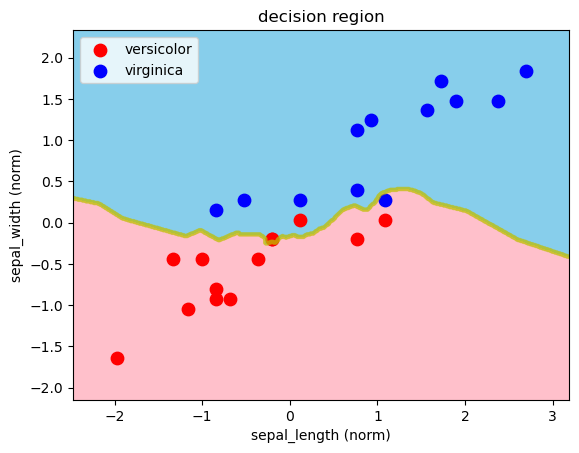

LogisticRegression
[2 2 1 1 1 1 1 1 2 1 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2]
[2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]


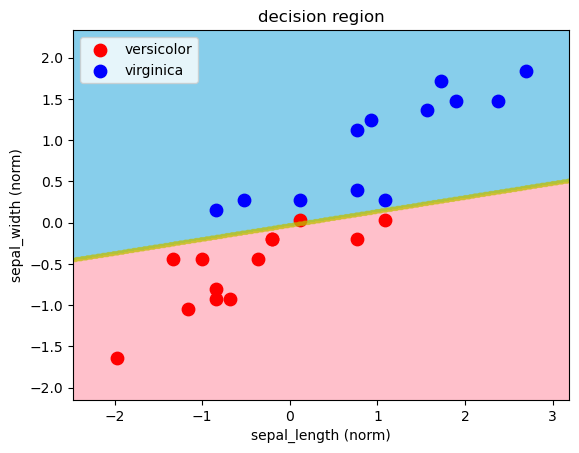

SVC
[2 2 1 1 1 1 1 1 2 1 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2]
[2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]


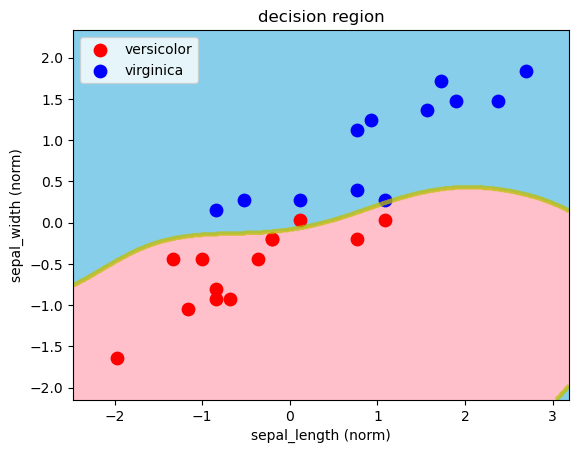

DecisionTreeClassifier
[2 1 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 2 2 2 1 2 1 2]
[2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]


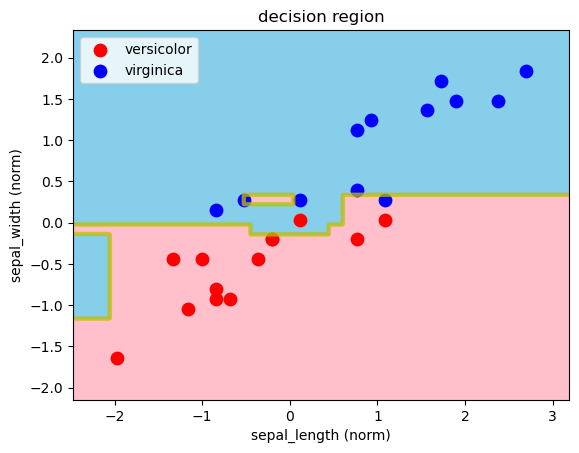

RandomForestClassifier
[2 2 1 1 1 2 1 1 2 1 2 2 1 2 1 1 2 1 2 2 2 1 2 1 2]
[2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]


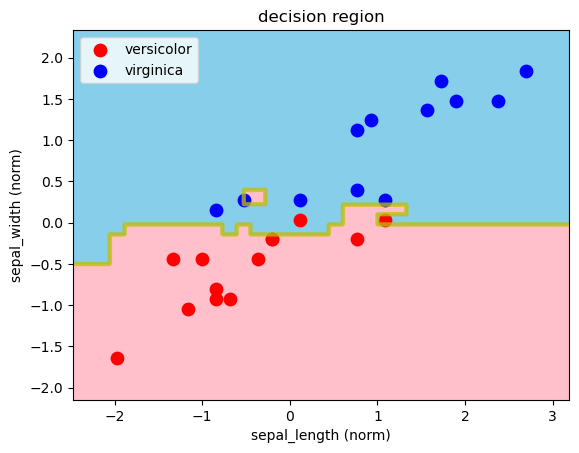

In [19]:
metrs = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1"])

for m in methods:
    print(m.__name__)
    model = m()
    # 学習
    model.fit(X_train_norm, y_train)
    # 推定
    y_pred = model.predict(X_valid_norm)
    print(y_pred)
    print(y_valid)
    # 評価
    metrs.loc[m.__name__, "accuracy"] = sklearn.metrics.accuracy_score(y_valid, y_pred)
    metrs.loc[m.__name__, "precision"] = sklearn.metrics.precision_score(y_valid, y_pred)
    metrs.loc[m.__name__, "recall"] = sklearn.metrics.recall_score(y_valid, y_pred)
    metrs.loc[m.__name__, "f1"] = sklearn.metrics.f1_score(y_valid, y_pred)
    # 可視化
    decision_region(X_valid_norm, y_valid, model, xlabel=f'{features[0]} (norm)', ylabel=f'{features[1]} (norm)')

In [20]:
# 指標値の表
metrs

,accuracy,precision,recall,f1
KNeighborsClassifier,0.84,0.909091,0.769231,0.833333
LogisticRegression,0.96,1.0,0.923077,0.96
SVC,0.96,1.0,0.923077,0.96
DecisionTreeClassifier,0.88,0.857143,0.923077,0.888889
RandomForestClassifier,0.88,0.916667,0.846154,0.88


f1スコアが良かったのは LogisticRegression と SVC である。
どちらも、滑らかで低分散な境界を引いている。

DecisionTreeClassifier と RandomForestClassifier は決定領域に不自然な飛び地ができており、
過剰な学習がされている気配がある。

## 【問題9】（アドバンス課題）標準化の有無の比較

KNeighborsClassifier(標準化なし)
[2 1 1 1 2 1 1 1 2 2 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2]
[2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]


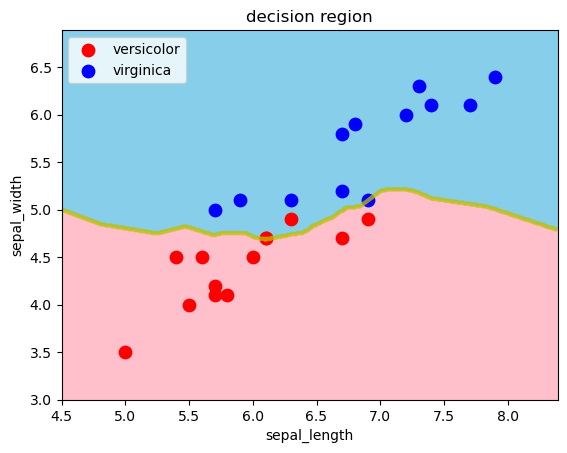

LogisticRegression(標準化なし)
[2 2 1 1 1 1 1 1 2 1 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2]
[2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]


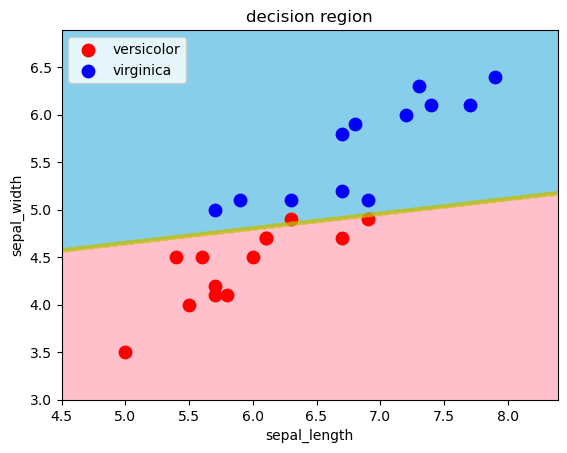

SVC(標準化なし)
[2 2 1 1 1 1 1 1 2 1 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2]
[2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]


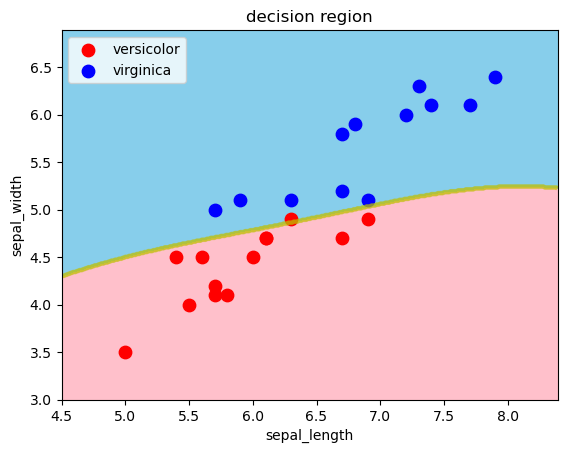

DecisionTreeClassifier(標準化なし)
[2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2]
[2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]


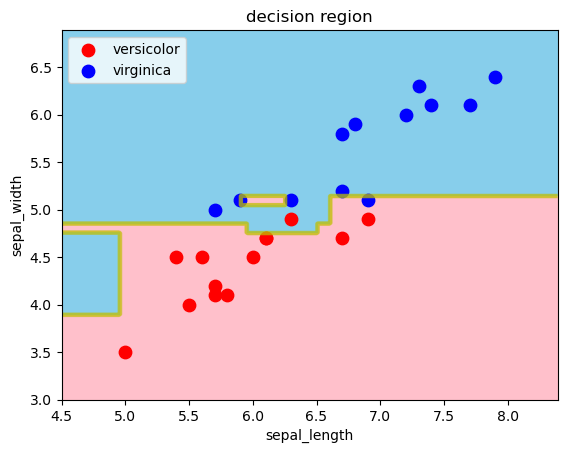

RandomForestClassifier(標準化なし)
[2 2 1 1 1 2 1 1 2 1 2 2 1 2 2 1 2 1 2 2 2 1 2 1 2]
[2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2]


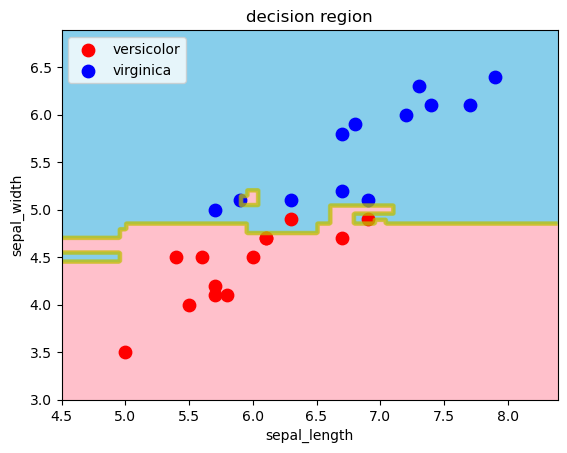

In [21]:
# 標準化なしで学習
for m in methods:
    print(m.__name__ + "(標準化なし)")
    model = m()
    # 学習
    model.fit(X_train, y_train)
    # 推定
    y_pred = model.predict(X_valid)
    print(y_pred)
    print(y_valid)
    # 評価
    metrs.loc[m.__name__ + "(標準化なし)", "accuracy"] = sklearn.metrics.accuracy_score(y_valid, y_pred)
    metrs.loc[m.__name__ + "(標準化なし)", "precision"] = sklearn.metrics.precision_score(y_valid, y_pred)
    metrs.loc[m.__name__ + "(標準化なし)", "recall"] = sklearn.metrics.recall_score(y_valid, y_pred)
    metrs.loc[m.__name__ + "(標準化なし)", "f1"] = sklearn.metrics.f1_score(y_valid, y_pred)
    # 可視化
    decision_region(X_valid, y_valid, model, xlabel=f'{features[0]}', ylabel=f'{features[1]}')

In [22]:
# 標準化なしを含めた指標値の表
metrs

,accuracy,precision,recall,f1
KNeighborsClassifier,0.84,0.909091,0.769231,0.833333
LogisticRegression,0.96,1.0,0.923077,0.96
SVC,0.96,1.0,0.923077,0.96
DecisionTreeClassifier,0.88,0.857143,0.923077,0.888889
RandomForestClassifier,0.88,0.916667,0.846154,0.88
KNeighborsClassifier(標準化なし),0.84,0.909091,0.769231,0.833333
LogisticRegression(標準化なし),0.96,1.0,0.923077,0.96
SVC(標準化なし),0.96,1.0,0.923077,0.96
DecisionTreeClassifier(標準化なし),0.92,0.923077,0.923077,0.923077
RandomForestClassifier(標準化なし),0.92,1.0,0.846154,0.916667


標準化は線形な変換なので、分類領域の形を大きくは変えないが、軸のスケールが合ったことでより直線的に
分離しやすくなっているように見える。

ただし、結果の表から必ずしも標準化は分類精度を高めるわけではないことも分かる。

決定木は標準化のありなしで分類境界に違いが出ていない（ただし、計算誤差で境界上のサンプルが違う分類結果になった）。

## 【問題10】（アドバンス課題）すべての目的変数を使用して精度が高い手法

In [23]:
# 可視化関数を改造
def decision_region3(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['lightgreen', 'pink', 'skyblue']
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [24]:
df_selected3 = df[["sepal_length", "petal_length", "Species"]]
df_selected3

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [25]:
# 前処理・訓練データと検証データの分割
X = df_selected3.iloc[:, 0:2].to_numpy()
y = df_selected3.iloc[:, 2].to_numpy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=131)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((112, 2), (38, 2), (112,), (38,))

In [26]:
# 標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_valid_norm = scaler.transform(X_valid)
X_valid_norm

array([[-0.85087262, -1.0064081 ],
       [-0.02629396,  0.18068912],
       [ 1.7406603 ,  1.48084321],
       [ 0.20929994,  0.63291663],
       [ 0.44489384,  0.97208726],
       [ 0.56269079,  0.74597351],
       [ 0.68048774,  0.91555882],
       [-1.20426347, -1.17599342],
       [-1.08646652, -1.23252185],
       [ 1.15167554,  1.0286157 ],
       [-0.61527871, -1.23252185],
       [-0.26188786,  0.68944507],
       [-0.85087262, -1.17599342],
       [-0.14409091,  0.29374599],
       [-1.08646652, -1.23252185],
       [-0.37968481, -1.34557873],
       [-0.85087262, -1.28905029],
       [ 1.26947249,  0.97208726],
       [ 0.79828469,  0.85903038],
       [ 0.56269079,  1.31125789],
       [ 0.79828469,  0.80250194],
       [ 0.79828469,  1.0286157 ],
       [-0.96866957, -0.10195308],
       [ 0.79828469,  1.19820102],
       [ 0.32709689,  0.51985975],
       [ 1.62286334,  1.31125789],
       [ 0.68048774,  0.35027443],
       [ 0.32709689,  1.08514414],
       [ 0.68048774,

KNeighborsClassifier


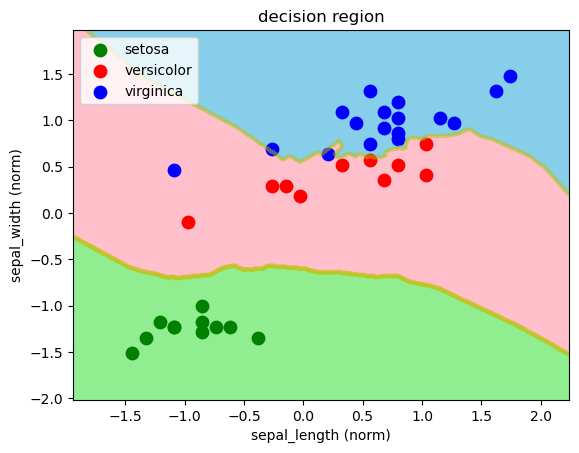

LogisticRegression


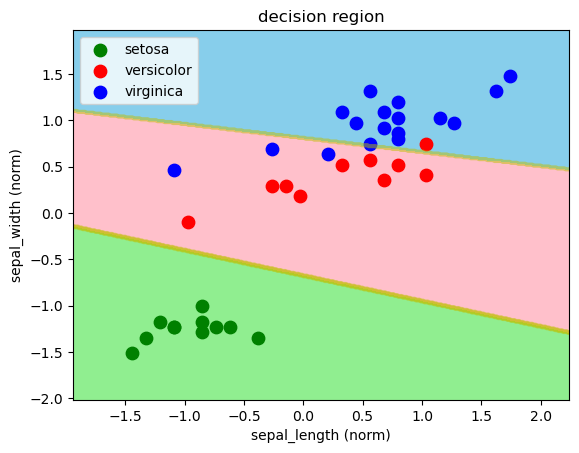

SVC


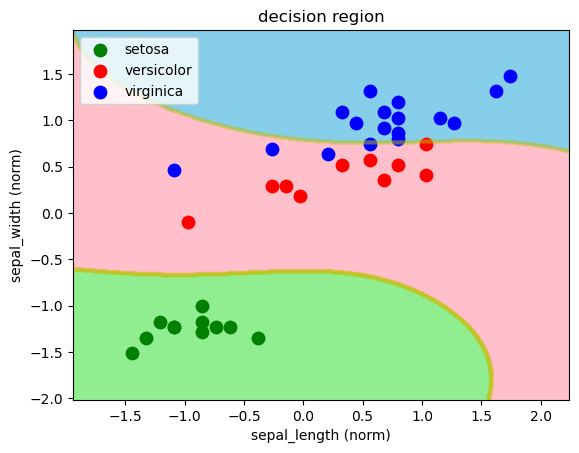

DecisionTreeClassifier


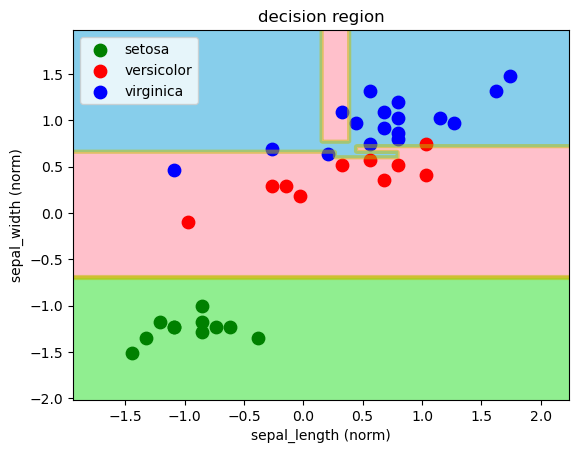

RandomForestClassifier


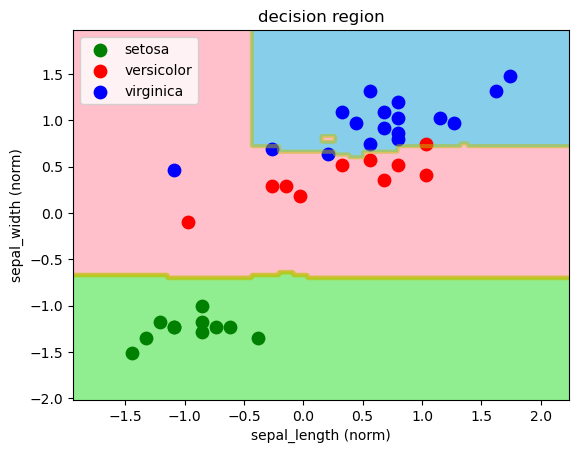

In [27]:
metrs = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1"])

for m in methods:
    print(m.__name__)
    model = m()
    # 学習
    model.fit(X_train_norm, y_train)
    # 推定
    y_pred = model.predict(X_valid_norm)
    # 評価
    metrs.loc[m.__name__, "accuracy"] = sklearn.metrics.accuracy_score(y_valid, y_pred)
    metrs.loc[m.__name__, "precision"] = sklearn.metrics.precision_score(y_valid, y_pred, average="macro")
    metrs.loc[m.__name__, "recall"] = sklearn.metrics.recall_score(y_valid, y_pred, average="macro")
    metrs.loc[m.__name__, "f1"] = sklearn.metrics.f1_score(y_valid, y_pred, average="macro")
    # 可視化
    decision_region3(X_valid_norm, y_valid, model, xlabel=f'{features[0]} (norm)', ylabel=f'{features[1]} (norm)')

In [28]:
metrs

,accuracy,precision,recall,f1
KNeighborsClassifier,0.947368,0.944444,0.960784,0.948864
LogisticRegression,0.894737,0.894444,0.907843,0.897727
SVC,0.894737,0.904762,0.921569,0.9
DecisionTreeClassifier,0.894737,0.894444,0.907843,0.897727
RandomForestClassifier,0.894737,0.894444,0.907843,0.897727


K近傍法が3値分類ではもっとも高精度